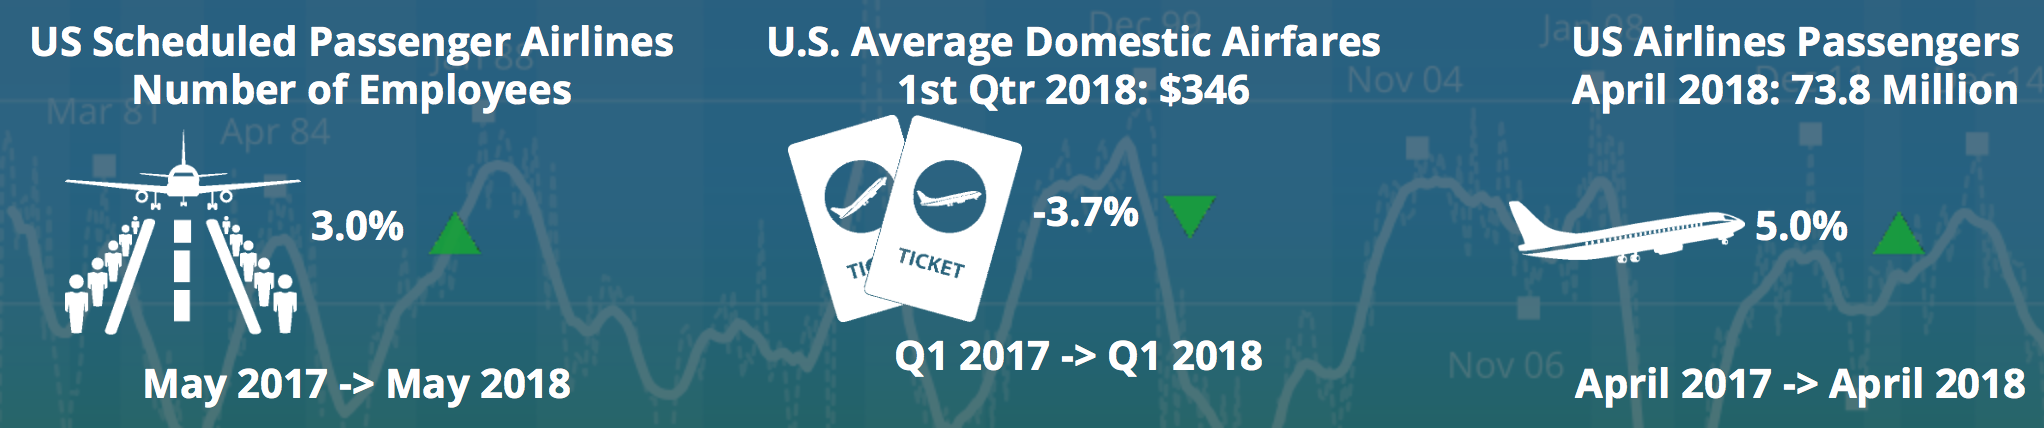

# Analyse exploratoire des données du transport aérien aux US 

## Les données proviennent du Bureau of Transportation Statistics des États-Unis pour l'année 2016. Nous allons ici analyser les différentes variables de la base de données afin d'en sélectionner pour par la suite entraîner un modèle de régression linéaire qui va nous permettre de prédire le retard d'un avion à son arrivée. 

In [1]:
# Importation de toutes les librairies utiles 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
# Chargement de la base de données qui est divisée en 12 parties 

janvier = pd.read_csv("Dataset+Projet+4/2016_01.csv", low_memory=False, sep=',')
fevrier = pd.read_csv("Dataset+Projet+4/2016_02.csv", low_memory=False, sep=',')
mars = pd.read_csv("Dataset+Projet+4/2016_03.csv", low_memory=False, sep=',')
# L'excel contenant le mois d'avril contient quelques erreurs, nous allons donc ignorer ces lignes
avril = pd.read_csv("Dataset+Projet+4/2016_12.csv", low_memory=False, sep=',', error_bad_lines=False)
mai = pd.read_csv("Dataset+Projet+4/2016_05.csv", low_memory=False, sep=',')
juin = pd.read_csv("Dataset+Projet+4/2016_06.csv", low_memory=False, sep=',')
juillet = pd.read_csv("Dataset+Projet+4/2016_07.csv", low_memory=False, sep=',')
aout = pd.read_csv("Dataset+Projet+4/2016_08.csv", low_memory=False, sep=',')
septembre = pd.read_csv("Dataset+Projet+4/2016_09.csv", low_memory=False, sep=',')
octobre = pd.read_csv("Dataset+Projet+4/2016_10.csv", low_memory=False, sep=',')
novembre = pd.read_csv("Dataset+Projet+4/2016_11.csv", low_memory=False, sep=',')
decembre = pd.read_csv("Dataset+Projet+4/2016_12.csv", low_memory=False, sep=',')

Afin d'économiser du temps de calcul et surtout pour satisfaire les conditions d'utilisation de pythonanywhere (fichier <100mo), je vais uniquement travailler sur un échantillon de cette base de données. 

In [3]:
frames = [janvier.sample(frac=0.1, random_state=0), fevrier.sample(frac=0.1, random_state=0), mars.sample(frac=0.1, random_state=0),
         avril.sample(frac=0.1, random_state=0), mai.sample(frac=0.1, random_state=0), juin.sample(frac=0.1, random_state=0),
         juillet.sample(frac=0.1, random_state=0), aout.sample(frac=0.1, random_state=0), septembre.sample(frac=0.1, random_state=0),
         octobre.sample(frac=0.1, random_state=0), novembre.sample(frac=0.1, random_state=0), decembre.sample(frac=0.1, random_state=0)]

data = pd.concat(frames)

# Exploration et nettoyage des données

In [4]:
data.sample(n=10)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
208993,2016,3,9,16,5,2016-09-16,UA,19977,UA,N57857,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216534,2016,4,12,15,4,2016-12-15,B6,20409,B6,N520JB,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34452,2016,4,12,18,7,2016-12-18,DL,19790,DL,N549US,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419782,2016,1,2,29,1,2016-02-29,WN,19393,WN,N602SW,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235812,2016,4,12,23,5,2016-12-23,NK,20416,NK,N624NK,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402343,2016,1,3,4,5,2016-03-04,AA,19805,AA,N944UW,...,1,2.0,0.0,0.0,0.0,15.0,NaN,NaN,NaN,NaN
44239,2016,1,1,3,7,2016-01-03,AA,19805,AA,N955UW,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235516,2016,1,3,19,6,2016-03-19,WN,19393,WN,N949WN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252058,2016,1,1,17,7,2016-01-17,DL,19790,DL,N828DN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70599,2016,3,8,24,3,2016-08-24,AA,19805,AA,N971UY,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On remarque ici plusieurs colonnes contenant de nombreuses valeurs manquantes, on va devoir s'en occuper pour pouvoir entraîner nos futurs modèles.

In [5]:
data.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY

Text(0.5,1,'Proportion des colonnes avec des valeurs manquantes')

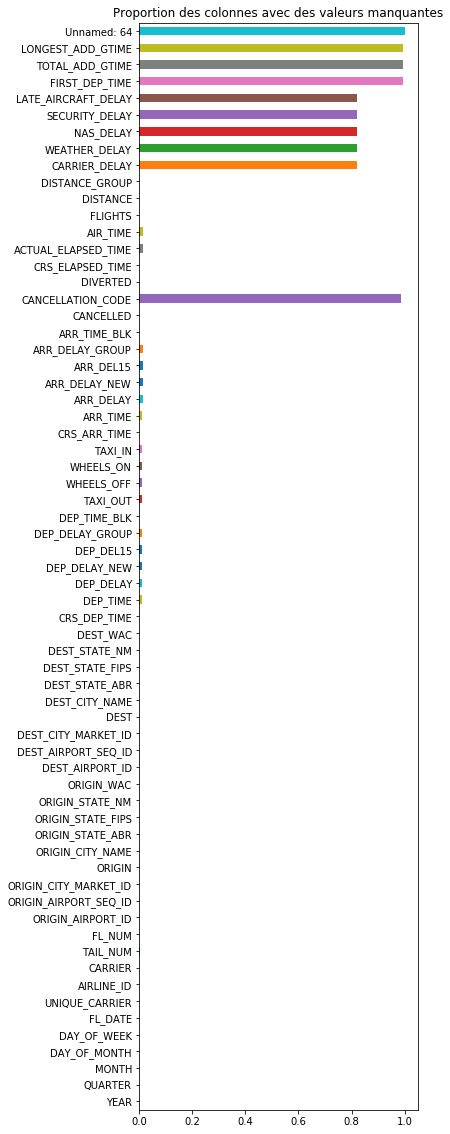

In [6]:
# Proportion des colonnes avec des valeurs manquantes

plt.figure(figsize=(5, 20))
data.isnull().mean(axis=0).plot.barh()
plt.title("Proportion des colonnes avec des valeurs manquantes")

On voit ici qu'il y a une dizaine de variables avec plus de 80% de valeurs manquantes, ces variables sont donc inutilisables. Je décide donc de les supprimer.

In [7]:
data = data.loc[:, pd.notnull(data).sum()>len(data)*.8]

Text(0.5,1,'Proportion des colonnes avec des valeurs manquantes')

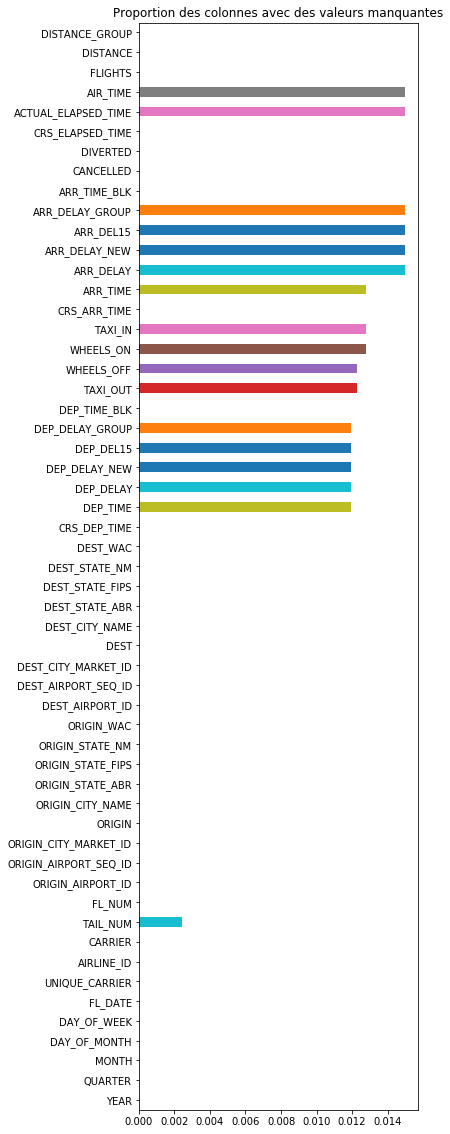

In [8]:
# Proportion des colonnes avec des valeurs manquantes

plt.figure(figsize=(5, 20))
data.isnull().mean(axis=0).plot.barh()
plt.title("Proportion des colonnes avec des valeurs manquantes")

À nouveau on voit beaucoup de valeurs manquantes, et notamment dans la colonne ARR_DELAY qui représente la valeur indiquant le retard à l'arrivée de l'avion. C'est cette valeur qui va nous permettre d'entraîner nos modèles. Je vais ici tout simplement éliminer les lignes qui n'ont pas de valeurs pour la colonne ARR_DELAY. En effet, sans cette valeur la ligne devient inutile. De plus, il y a moins d'un % de valeurs manquantes pour cette colonne. Donc, nous ne perdont pas beaucoup d'informations vu le volume de données que nous possédons dans notre échantillon (plus de 500 000 vols)

In [9]:
data = data.dropna(subset=["ARR_DELAY"])

Text(0.5,1,'Proportion des colonnes avec des valeurs manquantes')

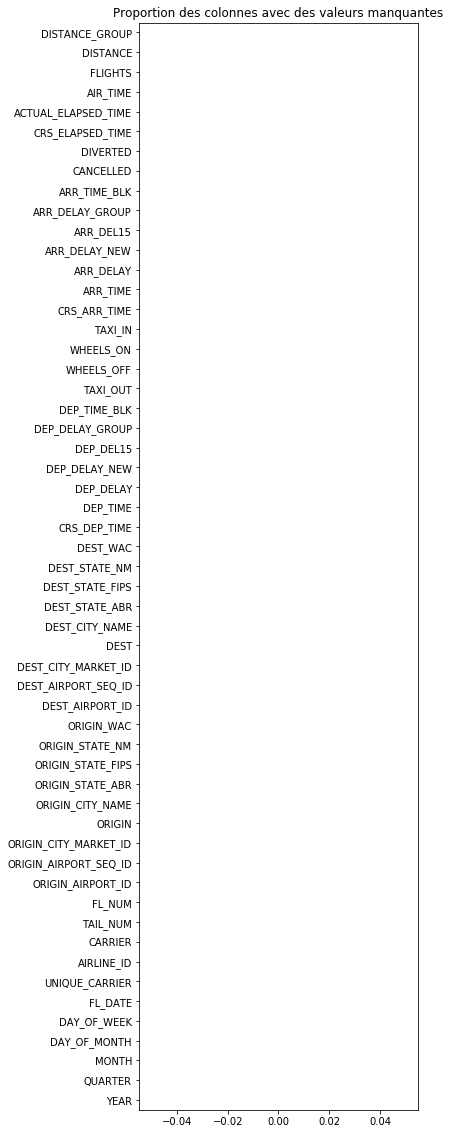

In [10]:
# Proportion des colonnes avec des valeurs manquantes

plt.figure(figsize=(5, 20))
data.isnull().mean(axis=0).plot.barh()
plt.title("Proportion des colonnes avec des valeurs manquantes")

En vérifiant une dernière fois la présence de valeurs manquantes, on remarque qu'il n'y en a plus. Notre base est maintenant nettoyée des valeurs manquantes. 

In [91]:
data.drop_duplicates()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_CODE
42213,2016,1,1,15,5,2016-01-15,0,19805,AA,N3LLAA,...,1800-1859,0.0,0.0,131.0,137.0,110.0,1.0,867.0,4,0
106194,2016,1,1,28,4,2016-01-28,2,20409,B6,N589JB,...,1000-1059,0.0,0.0,174.0,168.0,149.0,1.0,1197.0,5,2
424726,2016,1,1,27,3,2016-01-27,11,19393,WN,N7723E,...,1300-1359,0.0,0.0,90.0,87.0,71.0,1.0,460.0,2,11
409101,2016,1,1,22,5,2016-01-22,11,19393,WN,N7830A,...,1200-1259,0.0,0.0,65.0,57.0,44.0,1.0,239.0,1,11
194045,2016,1,1,22,5,2016-01-22,9,19977,UA,N14237,...,1000-1059,0.0,0.0,95.0,74.0,53.0,1.0,200.0,1,9
263192,2016,1,1,13,3,2016-01-13,3,19790,DL,N961DL,...,1800-1859,0.0,0.0,106.0,99.0,71.0,1.0,534.0,3,3
111802,2016,1,1,5,2,2016-01-05,5,20436,F9,N206FR,...,1800-1859,0.0,0.0,179.0,160.0,140.0,1.0,1024.0,5,5
68673,2016,1,1,30,6,2016-01-30,0,19805,AA,N808AW,...,0900-0959,0.0,0.0,143.0,137.0,120.0,1.0,899.0,4,0
395446,2016,1,1,18,1,2016-01-18,11,19393,WN,N269WN,...,2000-2059,0.0,0.0,105.0,98.0,83.0,1.0,589.0,3,11
50766,2016,1,1,8,5,2016-01-08,0,19805,AA,N543UW,...,0800-0859,0.0,0.0,126.0,108.0,88.0,1.0,529.0,3,0


# Feature selection

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553295 entries, 42213 to 193729
Data columns (total 55 columns):
YEAR                     553295 non-null int64
QUARTER                  553295 non-null int64
MONTH                    553295 non-null int64
DAY_OF_MONTH             553295 non-null int64
DAY_OF_WEEK              553295 non-null int64
FL_DATE                  553295 non-null object
UNIQUE_CARRIER           553295 non-null object
AIRLINE_ID               553295 non-null int64
CARRIER                  553295 non-null object
TAIL_NUM                 553295 non-null object
FL_NUM                   553295 non-null int64
ORIGIN_AIRPORT_ID        553295 non-null int64
ORIGIN_AIRPORT_SEQ_ID    553295 non-null int64
ORIGIN_CITY_MARKET_ID    553295 non-null int64
ORIGIN                   553295 non-null object
ORIGIN_CITY_NAME         553295 non-null object
ORIGIN_STATE_ABR         553295 non-null object
ORIGIN_STATE_FIPS        553295 non-null int64
ORIGIN_STATE_NM          553295 

Après le nettoyage de données il nous reste 56 variables divisées en 6 catégories :
* Time period
* Airline
* Origin
* Destination
* Departure / Arrival performance
* Flight summaries

Pour choisir mes features je vais simplement sélectionner celle qui nous donne le plus d'informations parmis ces catégories. 

* Time period
Parmi (year, flight date, quarter, month, day of month et day of week), je décide d'éliminer year, quarter et flight date pour garder le reste des variables car elles ne nous apportent pas d'informations supplémentaires en les conservant. 

* Airline
Je choisis ici de conserver uniquement la variable UniqueCarrier car les autres variables fournissent la même information mais sous une autre forme. Nous avons ici uniquement besoin de pouvoir différencier les compagnies et UniqueCarrier suffit amplement.

* Origin & Destination
Avec OriginAirportID et DestAirportID  nous avons l'information qui nous permet de connaître l'aéroport de départ et celui d'arrivée. Les autres variables n'apportent pas plus d'informations. 

* Departure / Arrival performance
Ici nous récupérons ARR_DELAY qui sera la target value de notre modèle. 

* Flight summaries
Nous conservons ici flights et distance.

Enfin, une autre hypothèse concernant le choix de nos variables est que nous devons choisir des informations uniquement disponible avant le vol. En effet, l'objectif final est de demander à notre utilisateur des informations sur son vol afin que l'on puisse lui prédire le retard de ce dernier. En effet, si l'utilisateur ne possède pas ces informations nous ne pourrons pas prédire le retard et notre modèle serait obsolète. 


In [12]:
data_new = data[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
                   'UNIQUE_CARRIER','ORIGIN_AIRPORT_ID', 
                    'DEST_AIRPORT_ID', 'DEP_TIME', 'ARR_TIME',
                 'DISTANCE', 'FLIGHTS', 'ARR_DELAY' ]]

In [28]:
data_new.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,ARR_TIME,DISTANCE,FLIGHTS,ARR_DELAY
count,553295.000000,553295.000000,553295.000000,553295.000000,553295.000000,553295.000000,553295.000000,553295.000000,553295.0,553295.000000
mean,7.201909,15.804649,3.923478,12684.844251,12681.871143,1334.015189,1472.285927,852.499170,1.0,4.170088
std,3.607484,8.815220,1.982568,1535.035139,1535.514984,502.819922,534.689506,620.409943,0.0,42.681903
min,1.000000,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,28.000000,1.0,-88.000000
25%,5.000000,8.000000,2.000000,11292.000000,11292.000000,917.000000,1053.000000,391.000000,1.0,-14.000000
50%,7.000000,16.000000,4.000000,12889.000000,12889.000000,1329.000000,1511.000000,679.000000,1.0,-6.000000
75%,10.000000,23.000000,6.000000,14057.000000,14057.000000,1743.000000,1919.000000,1096.000000,1.0,7.000000
max,12.000000,31.000000,7.000000,16218.000000,16218.000000,2400.000000,2400.000000,4983.000000,1.0,1395.000000


À première vue, la variable flights ne correspond pas à ce que l'on en attendait.

In [44]:
data_new.FLIGHTS

42213     1.0
106194    1.0
424726    1.0
409101    1.0
194045    1.0
263192    1.0
111802    1.0
68673     1.0
395446    1.0
50766     1.0
162382    1.0
30291     1.0
397300    1.0
277247    1.0
225343    1.0
43226     1.0
250620    1.0
164870    1.0
238829    1.0
102155    1.0
163588    1.0
419890    1.0
107596    1.0
172045    1.0
208077    1.0
381140    1.0
412011    1.0
17923     1.0
141409    1.0
113863    1.0
         ... 
338055    1.0
340312    1.0
131067    1.0
80250     1.0
226059    1.0
339066    1.0
208671    1.0
192732    1.0
49427     1.0
234964    1.0
405276    1.0
457431    1.0
339134    1.0
404188    1.0
319177    1.0
444526    1.0
334141    1.0
222098    1.0
294066    1.0
339692    1.0
325456    1.0
137414    1.0
121842    1.0
377467    1.0
324423    1.0
8634      1.0
304293    1.0
393619    1.0
223473    1.0
193729    1.0
Name: FLIGHTS, Length: 553295, dtype: float64

Je décide donc de ne pas l'utiliser.

In [45]:
data_new.drop(['FLIGHTS'], axis=1, inplace=True)

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Nous allons maintenant analyser notre target value ARR_DELAY

moy:
 4.170088289248954
med:
 -6.0


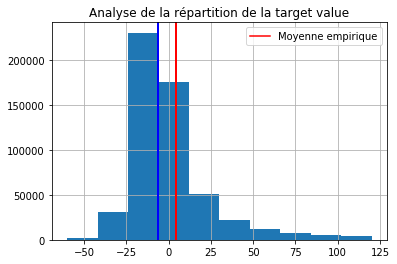

In [54]:

print("moy:\n",data_new['ARR_DELAY'].mean())
print("med:\n",data_new['ARR_DELAY'].median())
data_new['ARR_DELAY'].hist(range=(-60,120)) # Crée l'histogramme
plt.title("Analyse de la répartition de la target value")
xbar = data_new['ARR_DELAY'].mean()
xmed = data_new['ARR_DELAY'].median()
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(xmed, color='b', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='blue',markersize=15, label="Mediane")])
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])


Je dois bien conclure que même si cela est très surprenant, il y a de nombreux vols qui arrivent en avance. De plus, les données sont assez étendues, on a une fourchette de -60 à +120 pour la majorité des valeurs.

Avant d'analyser les autres variables, il serait intéressant de changer la valeur de ARR_TIME ET DEP_TIME afin de pouvoir les étudier graphiquement. Il est en effet plus intéressant d'avoir 24 catégories plutôt que des milliers. 

In [58]:
import math
data_new.DEP_TIME = data.CRS_DEP_TIME.map(lambda x : math.trunc(x/100))
data_new.ARR_TIME = data.CRS_ARR_TIME.map(lambda x : math.trunc(x/100))

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


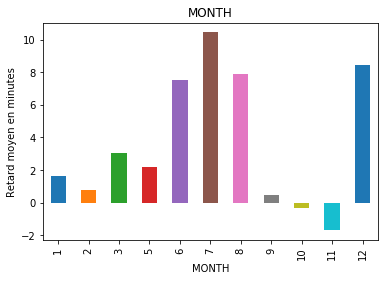

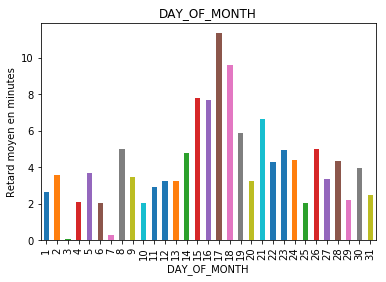

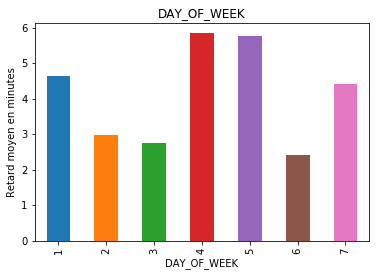

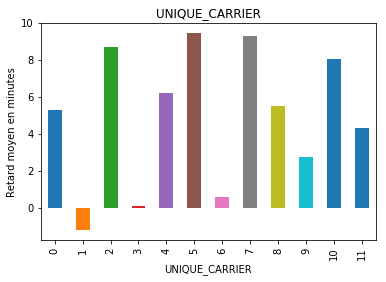

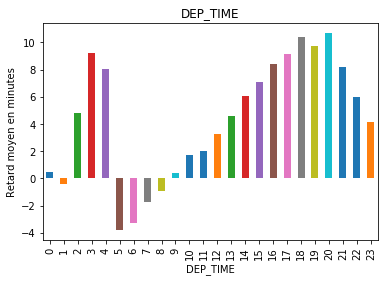

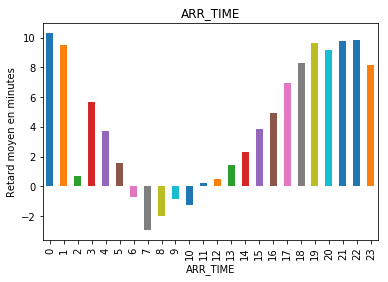

In [92]:
# Proportion of late flights per category based on all other flights

avgLate = data_new.as_matrix([data_new.columns[-1]]).flatten()
attributes = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
                   'UNIQUE_CARRIER', 'DEP_TIME', 'ARR_TIME']
for i,pred in enumerate(attributes):
    plt.figure(i, figsize=(15, 5))
    group = data_new.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'ARR_DELAY']]
    group.sort_values(by=pred, inplace=True)    
    group.plot.bar(x=pred, y='ARR_DELAY')
    plt.ylabel('Retard moyen en minutes')
    plt.title(pred)
    plt.legend().remove()

** Analyses : **

* Month :

Les résultats sont ici assez intuitifs, les périodes de vacances (juin, juillet, aout, décembre) sont les mois ayant les plus grands retards. Le mois de novembre doit être le mois à privilégier si l'on veut éviter les retards de vols. 

* Day of month :

Le milieu de mois est à éviter. 

* Day of week :

Les retards sont les plus conséquents les jeudi et vendredi. 

* Carrier ID :

Alaska Airlines, Delta Air Lines et Hawaiian Airlines sont les compagnies ayant le moins de retards, les deux premières ont même en moyenne de l'avance. 

* DEP_TIME ET ARR_TIME :

Ici aussi c'est assez intuitif, les heures creuses (7h à 12h) ont le moins de retard de vol. 


Text(0,0.5,'Flighs delays in minutes')

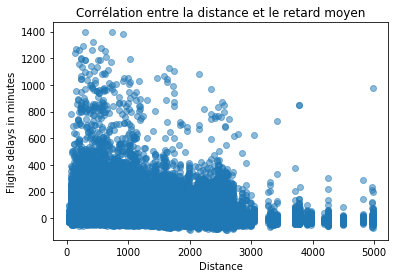

In [60]:
# Analyse de la corrélation entre la distance et le retard moyen

plt.plot(data_new["DISTANCE"],data_new["ARR_DELAY"],'o',alpha=0.5)
plt.title("Corrélation entre la distance et le retard moyen")
plt.xlabel("Distance")
plt.ylabel("Flighs delays in minutes")

La corrélation entre la distance et le retard ne semble pas évidente ici. 

# Opérations sur les variables et enregistrement de la nouvelle DB

In [88]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data_new["UNIQUE_CARRIER"] = labelencoder.fit_transform(data_new["UNIQUE_CARRIER"])

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [89]:
data_new

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,ARR_TIME,DISTANCE,ARR_DELAY
42213,1,15,5,0,13930,10721,15,18,867.0,29.0
106194,1,28,4,2,14027,10721,7,10,1197.0,-12.0
424726,1,27,3,11,11259,13198,11,13,460.0,-14.0
409101,1,22,5,11,11259,12191,11,12,239.0,5.0
194045,1,22,5,9,10721,11618,9,10,200.0,-25.0
263192,1,13,3,3,10397,12264,16,18,534.0,-12.0
111802,1,5,2,5,11292,14747,16,18,1024.0,-22.0
68673,1,30,6,0,11697,11278,6,9,899.0,-13.0
395446,1,18,1,11,12278,13232,18,20,589.0,-11.0
50766,1,8,5,0,11618,11057,6,8,529.0,-29.0


In [90]:
# Enregistrement au format CSV

data_new.to_csv("2016_sample.csv",index=False)